# Libraries

In [1]:
# tensorflow utils
import tensorflow as tf

# matplotlib utils
import matplotlib as mpl
import matplotlib.pyplot as plt

# other utils
import numpy as np
import pandas as pd
import seaborn as sn

# local assets
import attacks

# local config
mpl.rcParams['font.family'] = 'monospace'

# Test :: Classic MNIST

## Datasets

In [2]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

# convert to tensors
q_images = tf.convert_to_tensor(q_images, dtype=tf.float32)
q_labels = tf.convert_to_tensor(q_labels, dtype=tf.int32)

## Model

In [3]:
model = tf.keras.models.load_model('../models/adv/classic_mnist.normal.keras')

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.1029
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9348 - loss: 0.2096
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8866 - loss: 0.3827
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8151 - loss: 0.6098
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7408 - loss: 0.8832
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6617 - loss: 1.2305
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


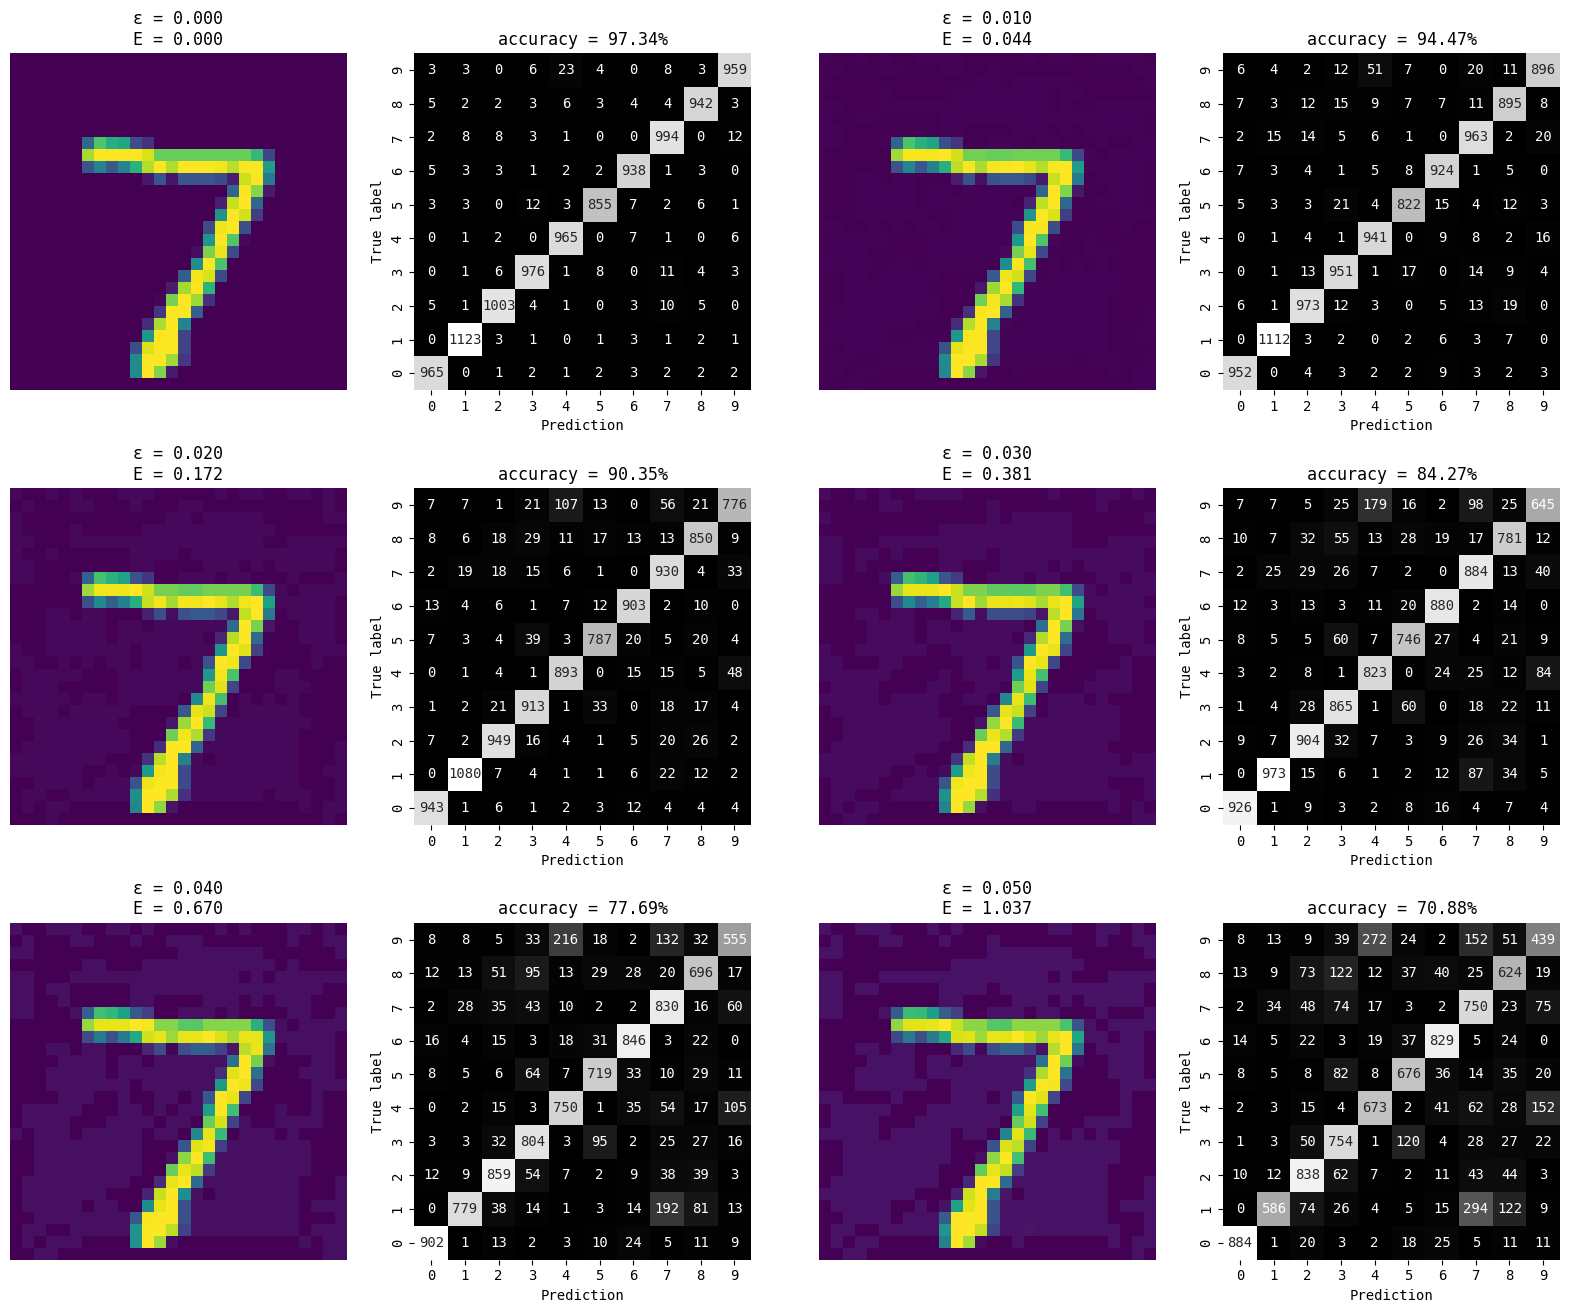

In [4]:
plt.figure(figsize=(20, 16))

attack_x = []
attack_y1 = []
attack_y2 = []

i = 0

for attack_lvl in np.linspace(0, 0.05, num=6):
    f_images = attacks.LowEnergyStochasticGradientSignAttack(
        model, q_images, q_labels, attack_lvl, 1.00, 1000, 100)
    
    # evaluation
    attack_acc = model.evaluate(f_images, q_labels)[1]
    attack_ene = ((q_images - f_images) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(f_images).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    attack_x.append(attack_lvl)
    attack_y1.append(attack_ene)
    attack_y2.append(attack_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'ε = {attack_lvl:.3f}\nΕ = {attack_ene:.3f}')
    plt.imshow(f_images[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {attack_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

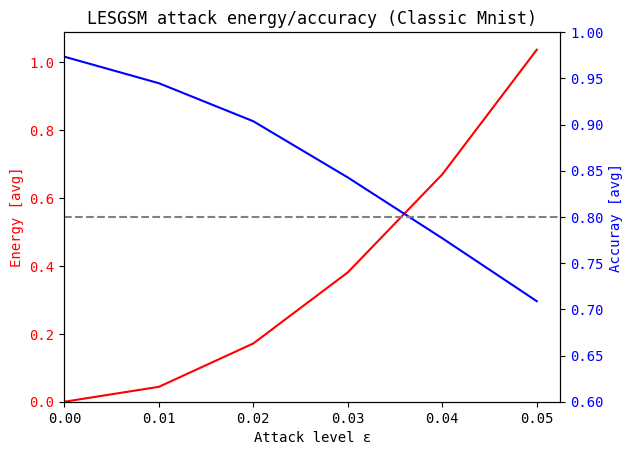

In [5]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('LESGSM attack energy/accuracy (Classic Mnist)')
ax1.set_xlabel('Attack level ε')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(attack_x, attack_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(attack_x, attack_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()

# Test :: Fashion MNIST

## Datasets

In [6]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.fashion_mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

# convert to tensors
q_images = tf.convert_to_tensor(q_images, dtype=tf.float32)
q_labels = tf.convert_to_tensor(q_labels, dtype=tf.int32)

## Model

In [7]:
model = tf.keras.models.load_model('../models/adv/fashion_mnist.normal.keras')

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9118 - loss: 0.2492
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8476 - loss: 0.4307
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7969 - loss: 0.5843
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7540 - loss: 0.7255
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7164 - loss: 0.8653
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6833 - loss: 1.0025
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


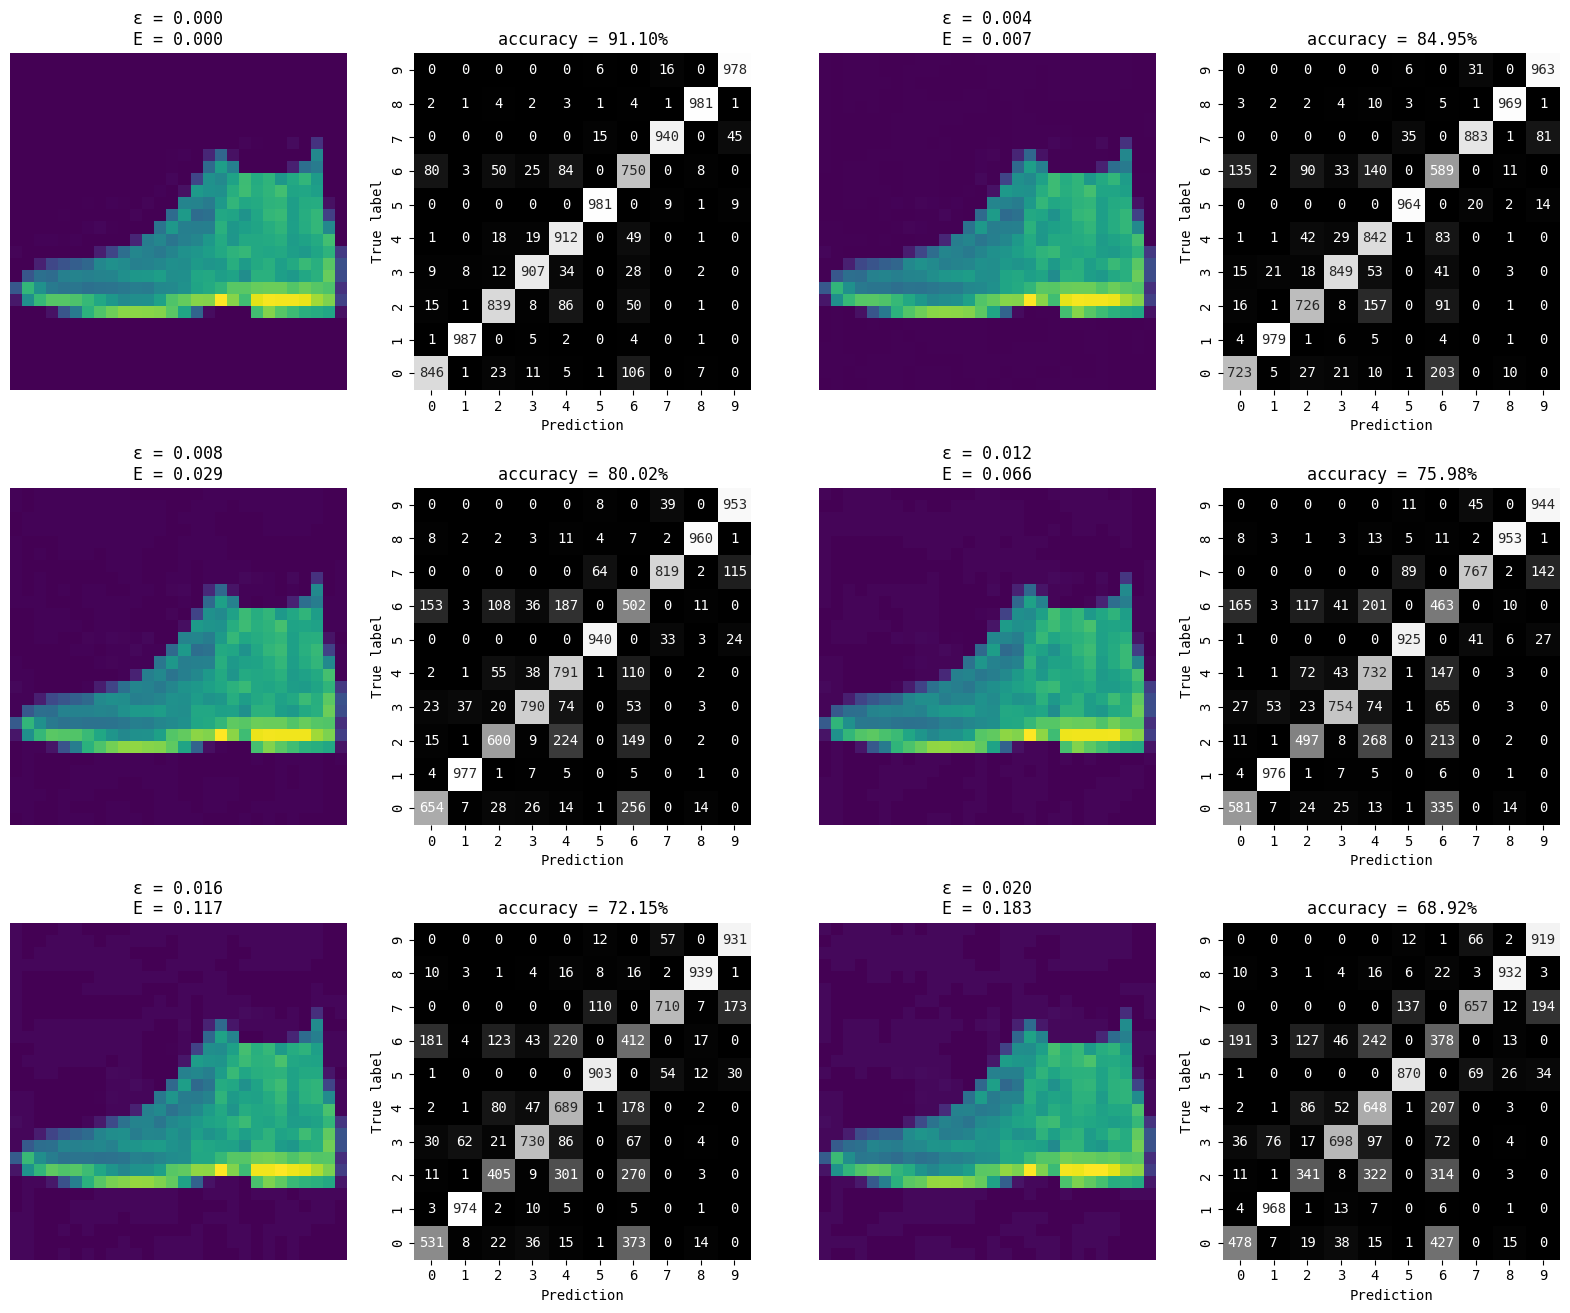

In [8]:
plt.figure(figsize=(20, 16))

attack_x = []
attack_y1 = []
attack_y2 = []

i = 0

for attack_lvl in np.linspace(0, 0.02, num=6):
    f_images = attacks.LowEnergyStochasticGradientSignAttack(
        model, q_images, q_labels, attack_lvl, 1.25, 1000, 100)
    
    # evaluation
    attack_acc = model.evaluate(f_images, q_labels)[1]
    attack_ene = ((q_images - f_images) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(f_images).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    attack_x.append(attack_lvl)
    attack_y1.append(attack_ene)
    attack_y2.append(attack_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'ε = {attack_lvl:.3f}\nΕ = {attack_ene:.3f}')
    plt.imshow(f_images[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {attack_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

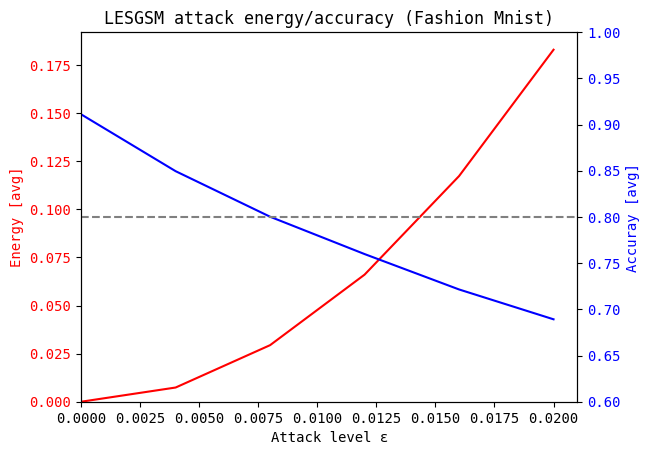

In [9]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('LESGSM attack energy/accuracy (Fashion Mnist)')
ax1.set_xlabel('Attack level ε')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(attack_x, attack_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(attack_x, attack_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()